In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/70-dog-breedsimage-data-set/dogs.csv
/kaggle/input/70-dog-breedsimage-data-set/valid/Cocker/10.jpg
/kaggle/input/70-dog-breedsimage-data-set/valid/Cocker/03.jpg
/kaggle/input/70-dog-breedsimage-data-set/valid/Cocker/01.jpg
/kaggle/input/70-dog-breedsimage-data-set/valid/Cocker/02.jpg
/kaggle/input/70-dog-breedsimage-data-set/valid/Cocker/09.jpg
/kaggle/input/70-dog-breedsimage-data-set/valid/Cocker/05.jpg
/kaggle/input/70-dog-breedsimage-data-set/valid/Cocker/06.jpg
/kaggle/input/70-dog-breedsimage-data-set/valid/Cocker/04.jpg
/kaggle/input/70-dog-breedsimage-data-set/valid/Cocker/08.jpg
/kaggle/input/70-dog-breedsimage-data-set/valid/Cocker/07.jpg
/kaggle/input/70-dog-breedsimage-data-set/valid/American  Spaniel/10.jpg
/kaggle/input/70-dog-breedsimage-data-set/valid/American  Spaniel/03.jpg
/kaggle/input/70-dog-breedsimage-data-set/valid/American  Spaniel/01.jpg
/kaggle/input/70-dog-breedsimage-data-set/valid/American  Spaniel/02.jpg
/kaggle/input/70-dog-breedsimage-data

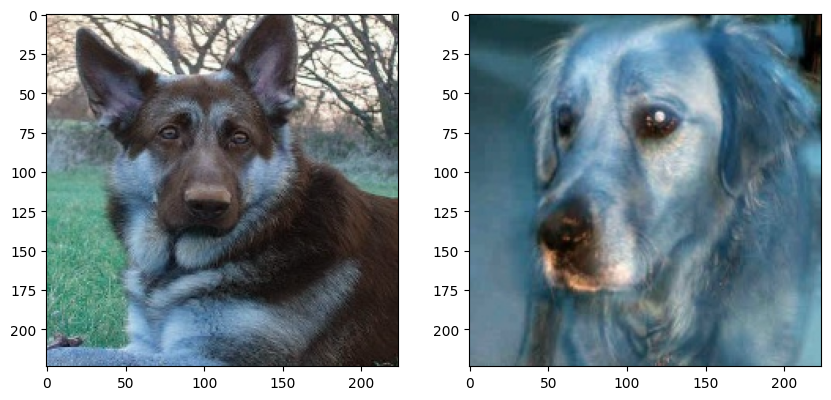

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img_path_1 = '/kaggle/input/70-dog-breedsimage-data-set/test/German Sheperd/01.jpg'
img_1 = cv2.imread(img_path_1)
img_path_2 = '/kaggle/input/70-dog-breedsimage-data-set/test/Golden Retriever/01.jpg'
img_2 = cv2.imread(img_path_2)
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(img_1)
plt.subplot(122)
plt.imshow(img_2);

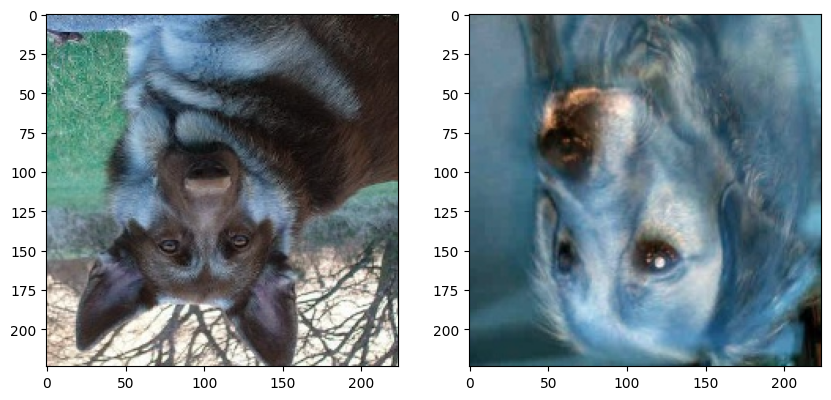

In [3]:
#Basic image manipulation (rotating/flipping)
flip_img_1=cv2.flip(img_1,0) # vertical flip
flip_img_2=cv2.flip(img_2,0) # vertical flip

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(flip_img_1)
plt.subplot(122)
plt.imshow(flip_img_2)

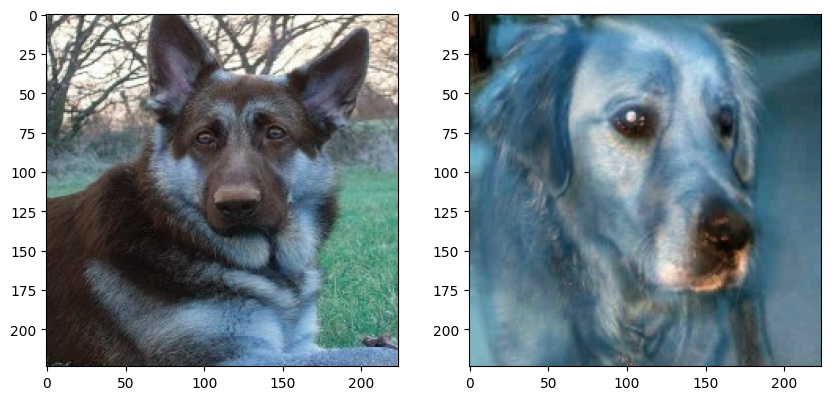

In [4]:
#horizontal flip
flip_img_1=cv2.flip(img_1,1) # horizontal flip
flip_img_2=cv2.flip(img_2,1) # horizontal flip

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(flip_img_1)
plt.subplot(122)
plt.imshow(flip_img_2)

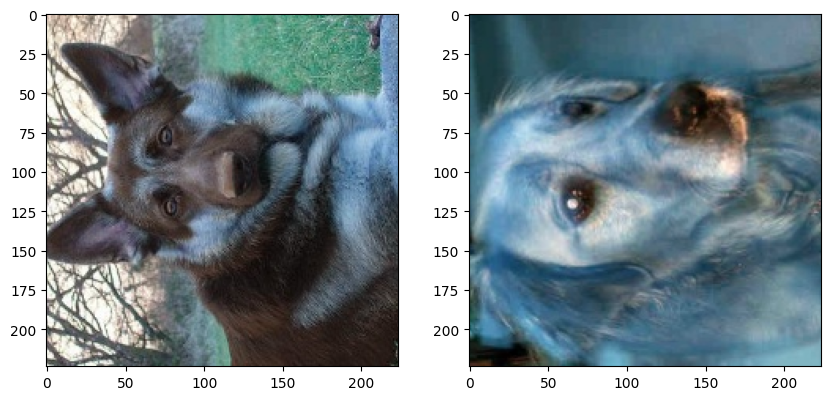

In [5]:
transp_img_1=cv2.transpose(img_1,1) # transpose
transp_img_2=cv2.transpose(img_2,1) # transpose

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(transp_img_1)
plt.subplot(122)
plt.imshow(transp_img_2)

In [6]:
print("German Sheperd image min/max values and co-ordinates")

for i in range(0,3):
   min_value, max_value, min_location, max_location=cv2.minMaxLoc(img_1[:,:,i])
   print("min {} is at {}, and max {} is at {}".format(min_value, min_location, max_value, max_location))

print("Golden retriever image min/max values and co-ordinates")

for i in range(0,3):
   min_value, max_value, min_location, max_location=cv2.minMaxLoc(img_2[:,:,i])
   print("min {} is at {}, and max {} is at {}".format(min_value, min_location, max_value, max_location))

German Sheperd image min/max values and co-ordinates
min 0.0 is at (14, 211), and max 255.0 is at (8, 0)
min 4.0 is at (143, 165), and max 255.0 is at (37, 0)
min 0.0 is at (214, 220), and max 255.0 is at (78, 31)
Golden retriever image min/max values and co-ordinates
min 0.0 is at (218, 6), and max 255.0 is at (121, 66)
min 0.0 is at (221, 20), and max 244.0 is at (120, 63)
min 0.0 is at (218, 6), and max 253.0 is at (120, 63)


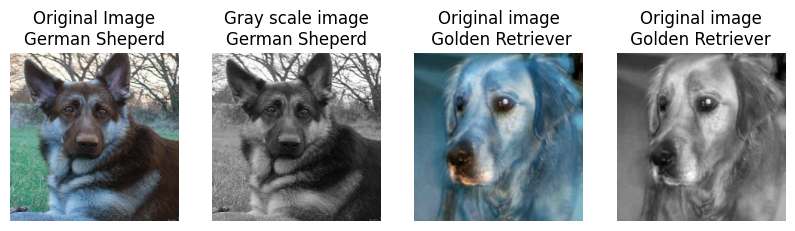

In [7]:
#Conversion to Gray scale image needed for pre-processing
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
%matplotlib inline


fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(10, 10))

ax1.imshow(img_1)
ax1.set_title('Original Image\nGerman Sheperd')
ax1.set_axis_off()

ax2.imshow(skic.rgb2gray(img_1), cmap ='gray')
ax2.set_title('Gray scale image\nGerman Sheperd')
ax2.set_axis_off()

ax3.imshow(img_2)
ax3.set_title('Original image\n Golden Retriever')
ax3.set_axis_off()


ax4.imshow(skic.rgb2gray(img_2),cmap = 'gray')
ax4.set_title('Original image\n Golden Retriever ')
ax4.set_axis_off()




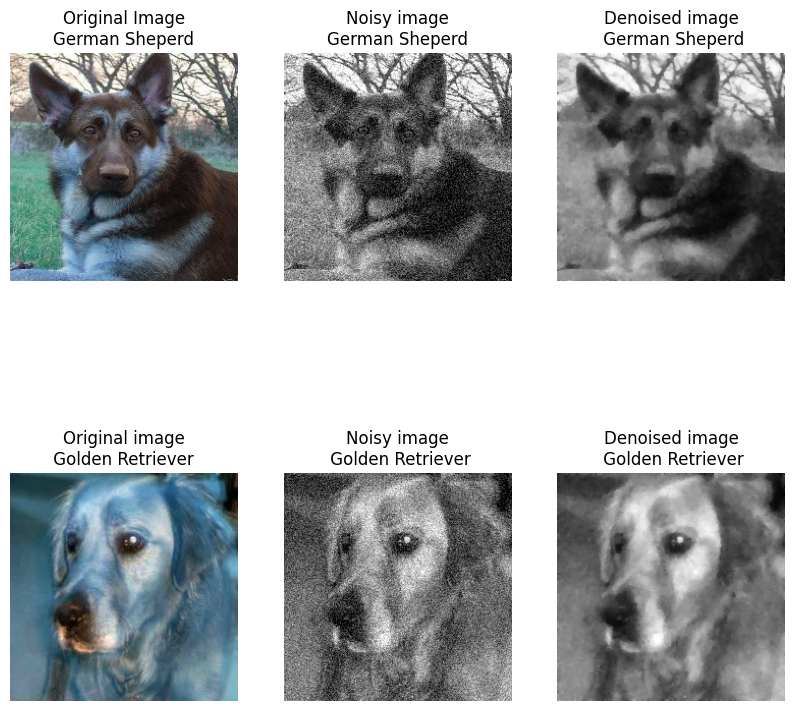

In [8]:
# We add Gaussian noise and denoise using denoise_tv_bregman approach
#for img_1 and img_2
img_1_n = sku.random_noise(skic.rgb2gray(img_1))
img_1_d = skimage.restoration.denoise_tv_bregman(img_1_n, 5.)

img_2_n = sku.random_noise(skic.rgb2gray(img_2))
img_2_d = skimage.restoration.denoise_tv_bregman(img_2_n, 5.)


fig, ((ax1, ax2,ax3), (ax4, ax5,ax6)) = plt.subplots(ncols=3,nrows=2,figsize=(10, 10))

ax1.imshow(img_1)
ax1.set_title('Original Image\nGerman Sheperd')
ax1.set_axis_off()

ax2.imshow(img_1_n, cmap ='gray')
ax2.set_title('Noisy image\nGerman Sheperd')
ax2.set_axis_off()

ax3.imshow(img_1_d, cmap = 'gray')
ax3.set_title('Denoised image\n German Sheperd')
ax3.set_axis_off()

ax4.imshow(img_2)
ax4.set_title('Original image\n Golden Retriever ')
ax4.set_axis_off()

ax5.imshow(img_2_n, cmap ='gray')
ax5.set_title('Noisy image\n Golden Retriever')
ax5.set_axis_off()

ax6.imshow(img_2_d, cmap = 'gray')
ax6.set_title('Denoised image\n Golden Retriever')
ax6.set_axis_off()

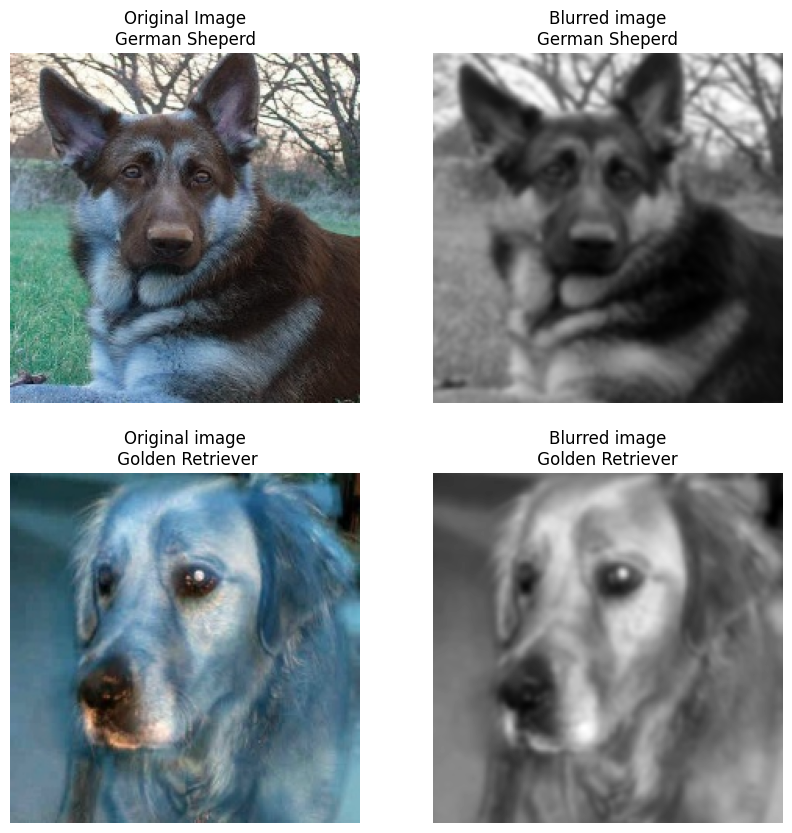

In [9]:
d=3
img_1_blur3 = cv2.GaussianBlur(skic.rgb2gray(img_1), (2*d+1, 2*d+1), -1)[d:-d,d:-d]
img_2_blur3 = cv2.GaussianBlur(skic.rgb2gray(img_2), (2*d+1, 2*d+1), -1)[d:-d,d:-d]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2,nrows=2,figsize=(10, 10))

ax1.imshow(img_1)
ax1.set_title('Original Image\nGerman Sheperd')
ax1.set_axis_off()

ax2.imshow(img_1_blur3, cmap ='gray')
ax2.set_title('Blurred image\nGerman Sheperd')
ax2.set_axis_off()

ax3.imshow(img_2)
ax3.set_title('Original image\n Golden Retriever')
ax3.set_axis_off()

ax4.imshow(img_2_blur3, cmap = 'gray')
ax4.set_title('Blurred image\n Golden Retriever ')
ax4.set_axis_off()

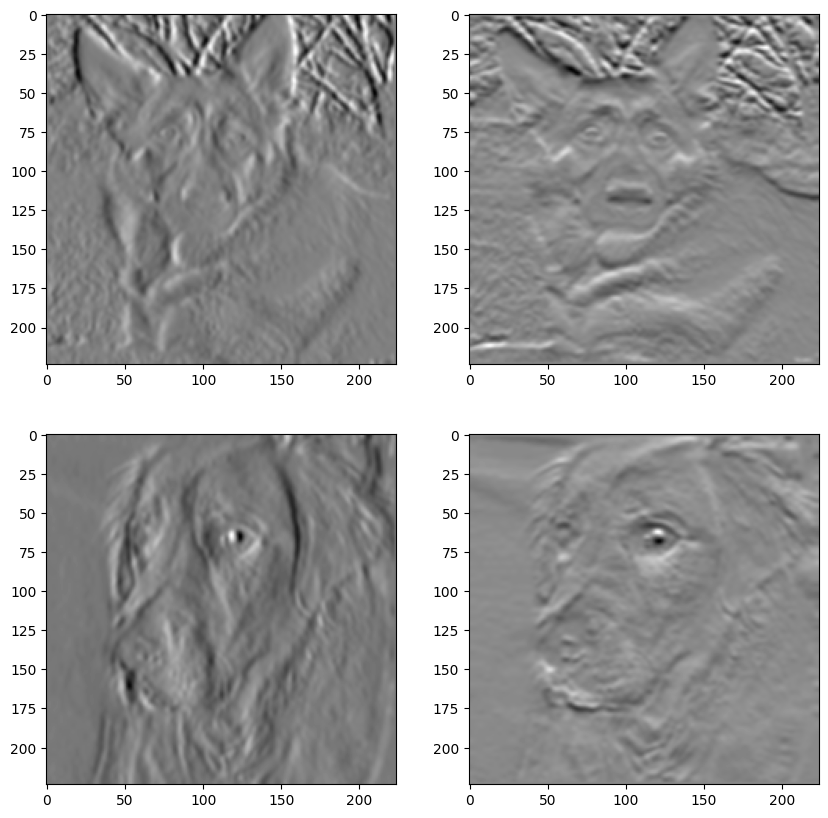

In [10]:
#Sobel edge detector
#edge detector works on gray scale images
sobel_img_1=cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)
sobel_img_2=cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)

sobelx_img_1 = cv2.Sobel(sobel_img_1,cv2.CV_64F,1,0,ksize=9)
sobely_img_1 = cv2.Sobel(sobel_img_1,cv2.CV_64F,0,1,ksize=9)

sobelx_img_2 = cv2.Sobel(sobel_img_2,cv2.CV_64F,1,0,ksize=9)
sobely_img_2 = cv2.Sobel(sobel_img_2,cv2.CV_64F,0,1,ksize=9)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(sobelx_img_1, cmap = 'gray')
plt.subplot(222)
plt.imshow(sobely_img_1, cmap = 'gray')
plt.subplot(223)
plt.imshow(sobelx_img_2, cmap = 'gray')
plt.subplot(224)
plt.imshow(sobely_img_2, cmap = 'gray')

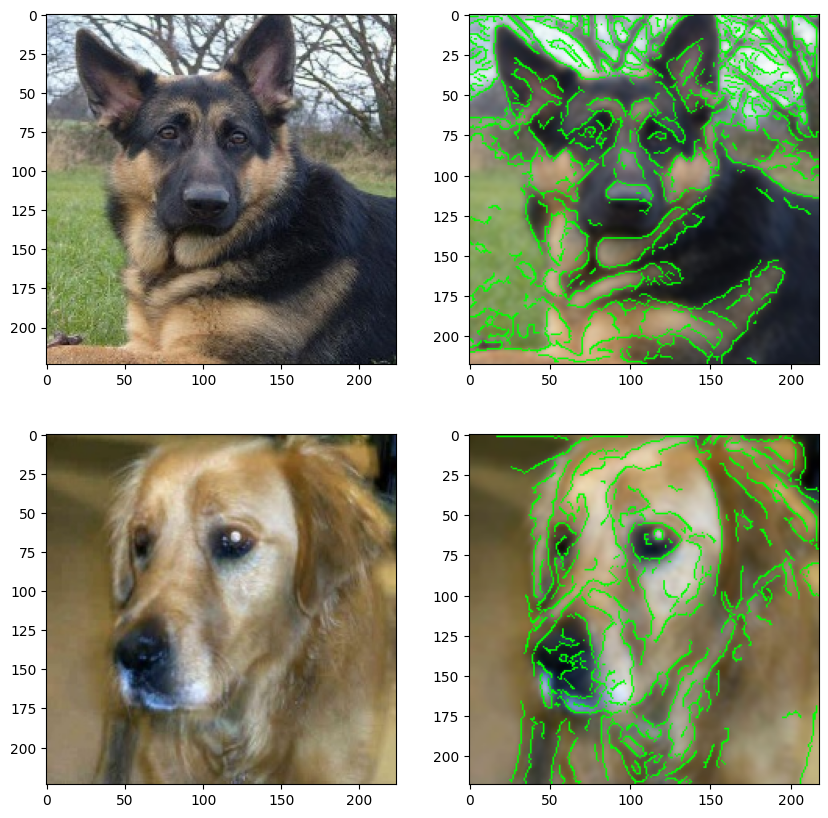

In [11]:
th1=30
th2=60
# Canny recommends threshold 2 is 3 times threshold 1
# you could try experimenting with this...
d=3
# gaussian blur
# this takes pixels in edgeresult where edge non-zero and colours them bright green

edgeresult_1=img_1.copy()
edgeresult_1 = cv2.GaussianBlur(edgeresult_1, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
gray_1 = cv2.cvtColor(edgeresult_1, cv2.COLOR_BGR2GRAY)
edge_1 = cv2.Canny(gray_1, th1, th2)
edgeresult_1[edge_1 != 0] = (0, 255, 0)

edgeresult_2=img_2.copy()
edgeresult_2 = cv2.GaussianBlur(edgeresult_2, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
gray_2 = cv2.cvtColor(edgeresult_2, cv2.COLOR_BGR2GRAY)
edge_2 = cv2.Canny(gray_2, th1, th2)
edgeresult_2[edge_2 != 0] = (0, 255, 0)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
plt.subplot(222)
plt.imshow(cv2.cvtColor(edgeresult_1, cv2.COLOR_BGR2RGB))
plt.subplot(223)
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
plt.subplot(224)
plt.imshow(cv2.cvtColor(edgeresult_2, cv2.COLOR_BGR2RGB))

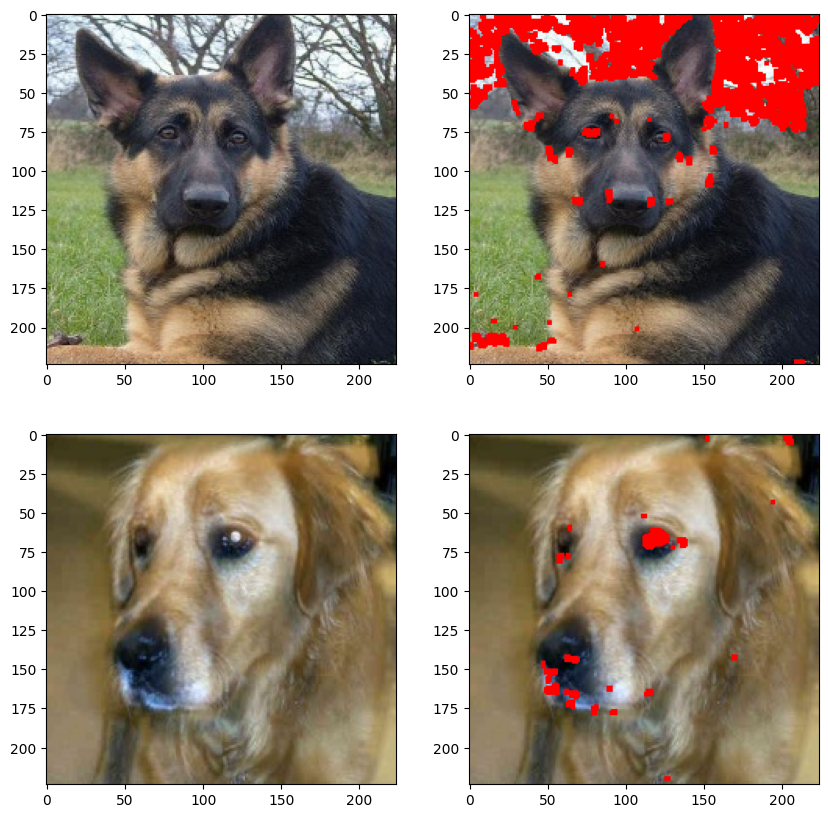

In [12]:
#detecting corners for  image_1
harris_1=img_1.copy()
#greyscale it
gray = cv2.cvtColor(harris_1,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
blocksize=4 #
kernel_size=3 # sobel kernel: must be odd and fairly small
# run the harris corner detector
dst = cv2.cornerHarris(gray,blocksize,kernel_size,0.05) # parameters are blocksize, Sobel parameter and Harris threshold
#result is dilated for marking the corners, this is visualisation related and just makes them bigger
dst = cv2.dilate(dst,None)
#we then plot these on the input image for visualisation purposes, using bright red
harris_1[dst>0.01*dst.max()]=[0,0,255]

#detecting corners for image_2
harris_2=img_2.copy()
#greyscale it
gray = cv2.cvtColor(harris_2,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
blocksize=4 #
kernel_size=3 # sobel kernel: must be odd and fairly small
# run the harris corner detector
dst = cv2.cornerHarris(gray,blocksize,kernel_size,0.05) # parameters are blocksize, Sobel parameter and Harris threshold
#result is dilated for marking the corners, this is visualisation related and just makes them bigger
dst = cv2.dilate(dst,None)
#we then plot these on the input image for visualisation purposes, using bright red
harris_2[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
plt.subplot(222)
plt.imshow(cv2.cvtColor(harris_1, cv2.COLOR_BGR2RGB))
plt.subplot(223)
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
plt.subplot(224)
plt.imshow(cv2.cvtColor(harris_2, cv2.COLOR_BGR2RGB))


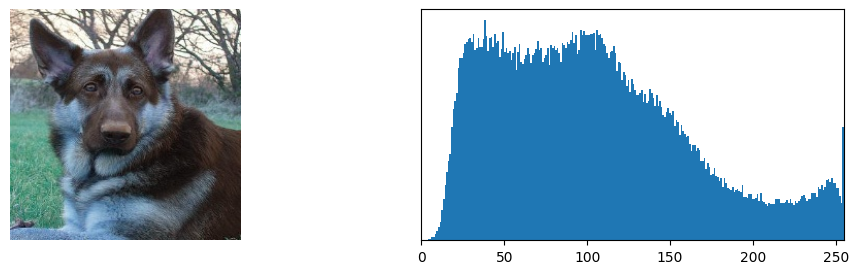

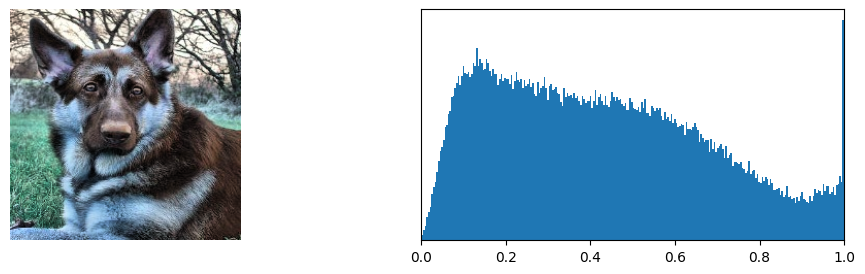

In [13]:
import skimage.exposure as skie
%matplotlib inline

def show(img):
    # Display the image.
    fig, (ax1, ax2) = plt.subplots(1, 2,
                                   figsize=(12, 3))

    ax1.imshow(img, cmap=plt.cm.gray)
    ax1.set_axis_off()

    # Display the histogram.
    ax2.hist(img.ravel(), lw=0, bins=256)
    ax2.set_xlim(0, img.max())
    ax2.set_yticks([])

    plt.show()
    
show(img_1)
show(skie.equalize_adapthist(img_1))

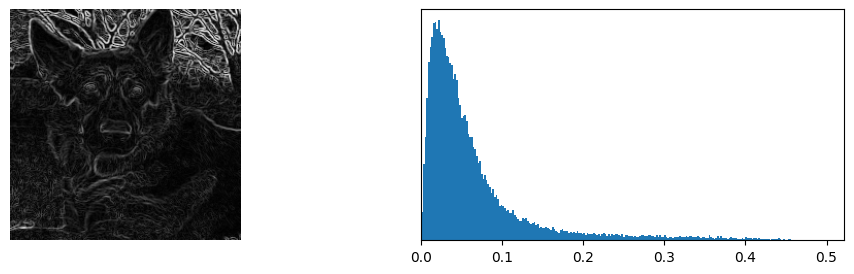

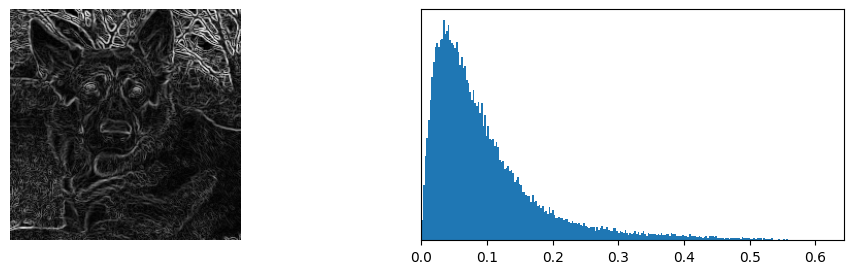

In [14]:
img = skic.rgb2gray(img_1)
sobimg_nheq= skif.sobel(img)
show(sobimg_nheq)
img = skic.rgb2gray(skie.equalize_adapthist(img_1))
sobimg_heq = skif.sobel(img)
show(sobimg_heq)

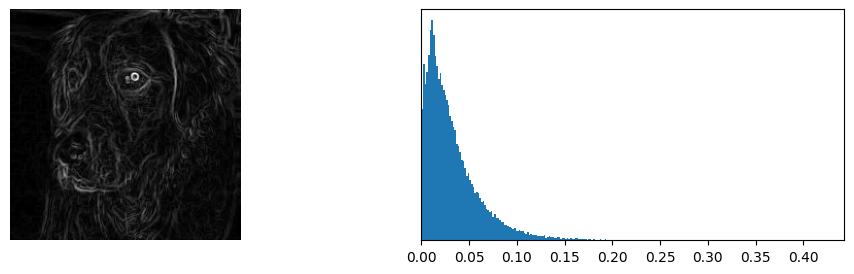

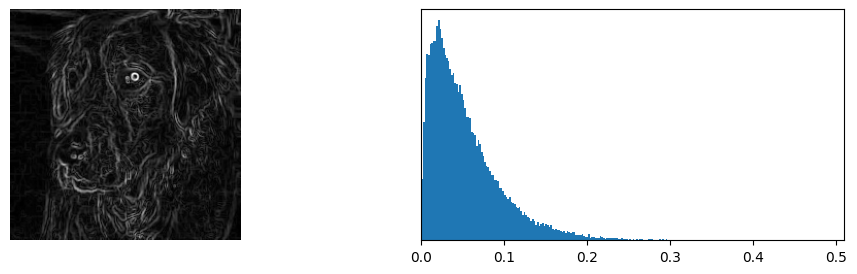

In [15]:
img = skic.rgb2gray(img_2)
sobimg_nheq= skif.sobel(img)
show(sobimg_nheq)
img = skic.rgb2gray(skie.equalize_adapthist(img_2))
sobimg_heq = skif.sobel(img)
show(sobimg_heq)